In [1]:
import time
import random
import numpy as np
from collections import defaultdict
from optparse import OptionParser

# Required libraries
import h5py
import keras
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.optimizers import SGD
from keras.utils.np_utils import to_categorical
from keras.layers.normalization import BatchNormalization as BN

import matplotlib.pylab as plt
%matplotlib inline

Using gpu device 0: GeForce GTX 980M (CNMeM is disabled)


In [2]:
import sys
sys.path.append('../repo/d-script/')
# d-script imports
from data_iters.minibatcher import MiniBatcher
from data_iters.iam_hdf5_iterator import IAM_MiniBatcher

### Notes on HDF5 Files

If we're parsing words, they've been used with the forms code, so they're only one level deep:

author
  key information
  
So, if you're using the code from iam_word_2_hdf5.py, always set the use_form to True.

Another note, since per author, there's not going to be a whole lot of content, you should set "num_forms_per_author=-1", in order to get maximal amount of content.

In [56]:
hdf5_file = '/memory/raw_forms_uint8.hdf5'
hdf5_file = '/memory/raw_lines_from_forms_uint8.hdf5'
hdf5_file = '/memory/raw_words_uint8.hdf5'
num_authors=5
num_forms_per_author=-1
shingle_dim=(120,1909)
shingle_dim=(100,200)
use_form=True
batch_size=32

In [57]:
iam_m = IAM_MiniBatcher(hdf5_file, num_authors, num_forms_per_author, shingle_dim=shingle_dim, use_form=use_form, default_mode=MiniBatcher.TRAIN, batch_size=batch_size)

In [58]:
[X_test, Y_test] = iam_m.get_train_batch(batch_size*20)
print "Shape="+str(X_test.shape)+", Max="+str(X_test.max())

Shape=(640, 100, 200), Max=0.949019610882


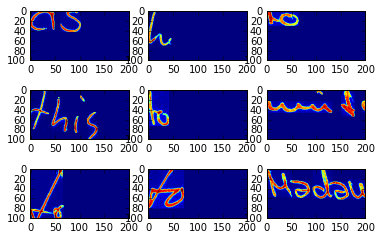

In [59]:
plt.clf
plt.subplots(3,3)
# plt.rcParams['figure.figsize'] = (40.0, 10.0)
# plt.figure(figsize=(20,10))
# fig,axes = plt.rcParams['figure.figsize'] = 60, 60
# plt.tight_layout()
# s = np.random.choice(32,9, replace=False)
s=xrange(9)
for i in xrange(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[s[i]])

[16 12 17 28 10 13 20 30 11]
